# Übung 4
## Generalized Hough Transform
### R-Table
Implementiere die Erstellung des R-Tables, wie in der Vorlesung beschrieben. Erstelle Dir ein Template aus dem Bild "animals.png", indem Du einen Bildbereich extrahierst (siehe Code unten) und dieses ROI mit Sobel und Canny weiterverarbeitest, um die Gradientenrichtungen und Kantensegmentierung zu erhalten. Erstelle nun das R-Table für Dein Template und zeichne als "Sanity Check" alle Zentrumsvektoren als Punkte, deren Farbe die Gradientenrichtung wiederspiegelt (am einfachsten einen Grauwertpixel setzen und die Colormap anpassen!).

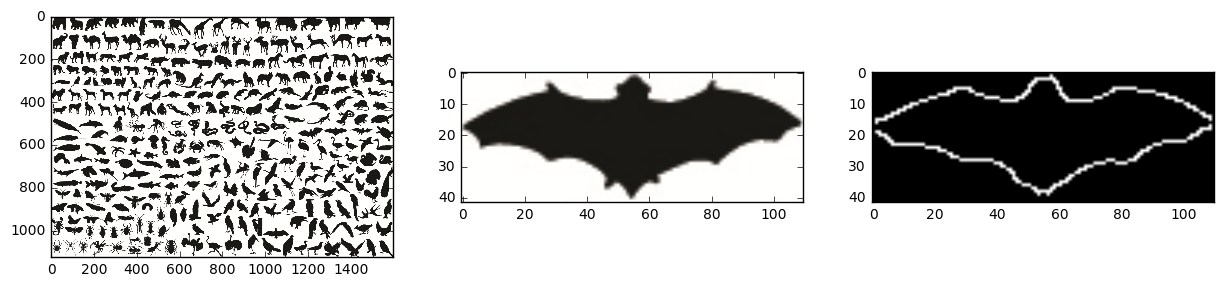

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color, filters
import numpy as np
from IPython.display import display
from scipy import ndimage, misc

animals = io.imread('images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge, cmap="Greys_r")



In [20]:
def build_r_table(img):
    height = np.shape(img)[0]
    width = np.shape(img)[1]
    
    center_x = int(width/2)
    center_y = int(height/2)
    
    img = color.rgb2gray(img)
    
    ximg = np.degrees(np.gradient(img))[1]
    yimg = np.degrees(np.gradient(img))[0]
    
    img = feature.canny(img)
    
    r_table = {}
    
    gradients = np.degrees(np.arctan2(yimg, ximg))
    #gradients = np.degrees(filters.sobel(img))
    
    for y_i in range(len(img)):
        for x_i in range(len(img[0])):
            p = img[y_i][x_i]
            if p > 0:
                x_diff = center_x - x_i
                y_diff = center_y -y_i
                phi = int(np.round(gradients[y_i][x_i],0))
                if phi in r_table:
                    r_table[phi].append([x_diff,y_diff])
                else:
                    r_table[phi] = [[x_diff,y_diff]]
       

    return r_table


r_table = build_r_table(bat)

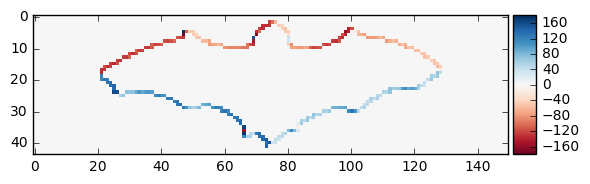

In [21]:
def show_r_table(rtable,w,h):
    output = np.zeros((h,w))
    center_x = int(w/2)
    center_y = int(h/2)
    for phi in rtable.keys():
        points = rtable[phi]
        for coords in points:
            output[center_y-coords[1]][center_x-coords[0]] = phi
    io.imshow(output)
            
show_r_table(r_table, 150,44)

### Akkumulator
Jetzt implementiere das Füllen des Akkumulators für ein gegebenes Suchbild, das in Form von zwei Matrizen übergeben wird:  Gradientenrichtungs- (Sobel) und Kantenbild (Canny). Natürlich könnt ihr auch Eure eigenen Implementierungen dafür nehmen ;)
Nimm nun das R-Table Deines Templates von oben und zeige den Akkumulator (als Bild) für folgenes Testszenario: 
- erstelle ein leeres Kantenbild und setze einen beliebigen Pixel auf 1
- setzte die korrespondierende Kantenrichtung auf einen beliebigen Richtungswert
- variiere diese Gradientenrichtung und zeige den Effekt im Akkumulator
- nimm nun das komplette Suchbild "animals.png" und zeige den Akkumulator

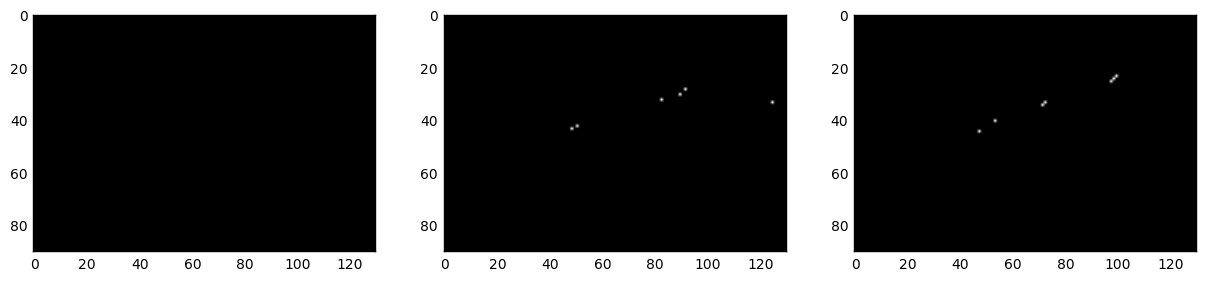

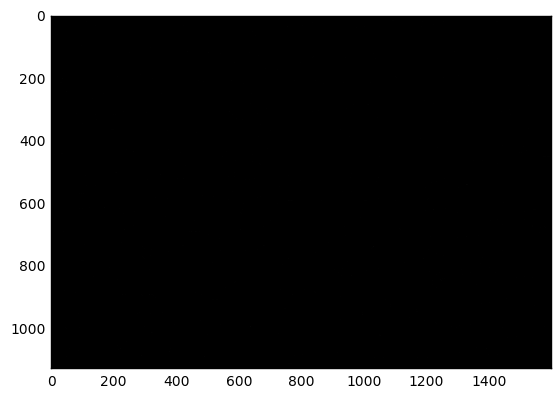

In [22]:
def general_hough(rtable, canny_img, sobel_img):    
    width = np.shape(canny_img)[1]
    height = np.shape(canny_img)[0]
    
    accu = np.zeros((height,width))
    
    for y in range(height):
        for x in range(width):
            if canny_img[y][x] > 0:
                gradient = int(np.round(np.degrees(sobel_img[y][x]),0))

                if gradient in rtable:
                    for coords in rtable[gradient]:
                        x2 = coords[0]
                        y2 = coords[1]
                        if y+y2 >= 0 and x+x2 >= 0 and y+y2 < height and x+x2 <width:
                            accu[y+y2][x+x2] += 1
    return accu


fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
fig2 = plt.figure(figsize=(15, 10))

ax4 = plt.subplot(2, 1, 1)
ax5 = plt.subplot(2, 1, 1)

test = np.zeros((90,130))
test[40][100] = 1
ximg = np.degrees(np.gradient(color.rgb2gray(test)))[1]
yimg = np.degrees(np.gradient(color.rgb2gray(test)))[0]
sobel_test = np.arctan2(yimg,ximg)


accu1 = general_hough(r_table,test,sobel_test)
ax1.imshow(accu1, cmap="Greys_r")



sobel_test[40][100] = 1.13446
accu2 = general_hough(r_table,test,sobel_test)
ax2.imshow(accu2, cmap="Greys_r")


sobel_test[40][100] = 0.785398
accu3 = general_hough(r_table,test,sobel_test)
ax3.imshow(accu3, cmap="Greys_r")


animals = color.rgb2gray(animals)
animals_canny = feature.canny(animals)
ximg = np.degrees(np.gradient(color.rgb2gray(animals)))[1]
yimg = np.degrees(np.gradient(color.rgb2gray(animals)))[0]
animals_sobel = np.arctan2(yimg,ximg)
accu4 = general_hough(r_table,animals_canny,animals_sobel)
ax4.imshow(accu4, cmap="Greys_r")


misc.imsave("accu4.jpg",accu4)



"Leider" ist das Maximum so stark, dass alle anderen Akkumulator-Erhöhungen untergehen. Deshalb folgt jetzt der vergrößerte Ausschnitt, in dem sich die Fledermaus befindet [500:640,1240:1400]

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


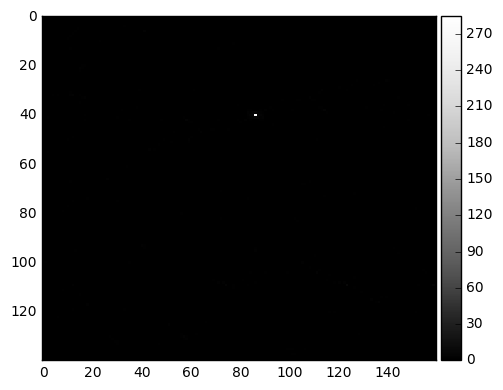

In [23]:
io.imshow(accu4[500:640,1240:1400], cmap="Greys_r")

Für das letzte Bild habe ich den Grauwert des Maximum-Pixels manuell von 285  auf 18 gesenkt, um die anderen Treffer zumindest etwas sichtbarer zu machen

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


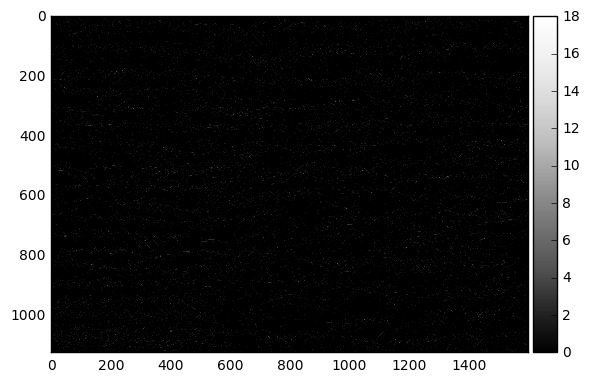

In [24]:
#io.imshow(np.log(accu4), cmap="Greys_r")
i,j =  np.unravel_index(accu4.argmax(), accu4.shape)
accu5 = accu4[:]
accu5[i][j] = 18
io.imshow(accu5, cmap="Greys_r")
misc.imsave("accu5.jpg",accu5)